In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
fcDir = 'FoldChange_ttest_GS/'
fcList = [fcDir + afile for afile in os.listdir(fcDir) if afile.startswith('FC')]
ttList = [fcDir + afile for afile in os.listdir(fcDir) if afile.startswith('ttest')]
fcList.sort()
ttList.sort()

In [3]:
inDict = dict(zip(fcList,ttList))
mDict={}
for afile in inDict:
    outName = afile.replace('FC','Combined_')
    species = afile.split('/')[-1].split('_')[1]
    condition = afile.split('/')[-1].split('_')[2]
    print(species,condition)
    if not species in mDict:mDict[species]={}
    #mDict[species][condition]=[]
    dffc = pd.read_csv(afile, index_col=0)
    dftt = pd.read_csv(inDict[afile], index_col=0)
    dfcombine = dffc.join(dftt)
    sigMet= list(dfcombine.loc[(np.abs(dfcombine['log2(FC)'])>=1) & (dfcombine['p.value']<=0.05)].index)
    mDict[species][condition]=sigMet
    dfcombine.to_csv(outName,sep='\t')

Maize Ndep
Maize Pdep
Pas Ndep
Pas Pdep
Sor Ndep
Sor Pdep


In [10]:
ZmNF = mDict['Maize']['Ndep']
ZmPF = mDict['Maize']['Pdep']
SbNF = mDict['Sor']['Ndep']
SbPF = mDict['Sor']['Pdep']
PvNF = mDict['Pas']['Ndep']
PvPF = mDict['Pas']['Pdep']

In [14]:
from collections import Counter
NFList = ZmNF+SbNF+PvNF
PFList = ZmPF+SbPF+PvPF
nCount = Counter(NFList)
pCount = Counter(PFList)
nCount

Counter({'allantoin': 3,
         'L-glutamine': 2,
         'Beta- alanine': 2,
         'L-asparagine': 2,
         'gamma-aminobutyric acid (GABA)': 2,
         'caffeic acid': 2,
         'L-threonine': 2,
         'capric acid': 2,
         'threonic acid': 2,
         'aspartic acid': 2,
         'beta-cyano-L-alanine': 2,
         'L-valine': 2,
         'L-serine': 2,
         'myristic acid': 1,
         '1,3-diaminopropane': 3,
         'glycerol 1-phosphate': 1,
         'L-homoserine': 1,
         'maleic acid': 3,
         'succinic acid': 3,
         'L-Isoleucine': 1,
         'L-leucine': 1,
         'Antiarol': 2,
         '3,5-dimethoxy-4-hydroxycinnamic acid': 2,
         'L-glutamic acid': 1,
         'adenosine': 1,
         'elaidic acid': 1,
         'citric acid': 1,
         '5,6-dihydrouracil': 1,
         'shikimic acid': 1,
         'L-proline': 1,
         'itaconic acid': 1,
         'spermidine': 1,
         'xylose': 1,
         'glyceric acid': 1,
     

In [16]:
NF1 = [x for x in nCount if nCount[x]==1]
PF1 = [x for x in pCount if pCount[x]==1]
ZmNF1 = [x for x in ZmNF if x in NF1]
SbNF1 = [x for x in SbNF if x in NF1]
ZmPF1 = [x for x in ZmPF if x in PF1]
SbPF1 = [x for x in SbPF if x in PF1]

In [21]:
dfZmNF1 = pd.read_csv('FoldChange_ttest_GS/Combined__Maize_Ndep_VS_FN.csv',sep='\t',index_col=0)
dfSbNF1 = pd.read_csv('FoldChange_ttest_GS/Combined__Sor_Ndep_VS_FN.csv', sep='\t',index_col=0)

In [25]:
dfZmPF1 = pd.read_csv('FoldChange_ttest_GS/Combined__Maize_Pdep_VS_FN.csv',sep='\t',index_col=0)
dfSbPF1 = pd.read_csv('FoldChange_ttest_GS/Combined__Sor_Pdep_VS_FN.csv', sep='\t',index_col=0)

In [28]:
SbZmPF2 = [x for x in ZmPF if x in SbPF]

In [29]:
dfZmPF1.loc[SbZmPF2]

,FoldChange,log2(FC),p.value,-log10,fdr
L-glutamine,0.115679,-3.111807,3.389017e-03,2.469926,0.011992
capric acid,0.217309,-2.202182,4.310223e-03,2.365500,0.014162
D-glucose-6-phosphate,0.231200,-2.112785,1.974586e-04,3.704524,0.001397
L-asparagine,0.327816,-1.609042,1.358234e-03,2.867025,0.005950
beta-cyano-L-alanine,0.344945,-1.535560,3.584009e-03,2.445631,0.012212
glycerol 1-phosphate,2.097624,1.068756,5.139244e-07,6.289101,0.000016


In [30]:
dfSbPF1.loc[SbZmPF2]

,FoldChange,log2(FC),p.value,-log10,fdr
L-glutamine,0.357245,-1.485015,0.000455,3.342319,0.003218
capric acid,0.401734,-1.315687,0.000039,4.413658,0.000535
D-glucose-6-phosphate,0.208798,-2.259823,0.000024,4.627580,0.000535
L-asparagine,0.240800,-2.054093,0.000040,4.400293,0.000535
beta-cyano-L-alanine,0.227286,-2.137422,0.000135,3.868288,0.001557
glycerol 1-phosphate,0.481941,-1.053071,0.000222,3.654517,0.002265


In [11]:
SbZmNF = [x for x in ZmNF if x in SbNF]
SbZmNF

['allantoin',
 'L-glutamine',
 'Beta- alanine',
 'L-asparagine',
 'gamma-aminobutyric acid (GABA)',
 'caffeic acid',
 'L-threonine',
 'capric acid',
 'threonic acid',
 'aspartic acid',
 'beta-cyano-L-alanine',
 'L-valine',
 'L-serine',
 '1,3-diaminopropane',
 'maleic acid',
 'succinic acid',
 'Antiarol',
 '3,5-dimethoxy-4-hydroxycinnamic acid']

In [23]:
import sys
sys.path.append(r'/home/gsun2unl/Documents/Nutrient_stress/DATA2019/DESeq2/venn')
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline
import venn

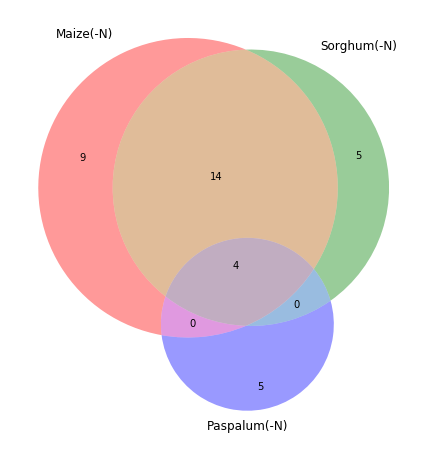

In [25]:
fig,ax = plt.subplots(figsize=(8,8))
ax = venn3([set(ZmNF), set(SbNF), set(PvNF)],('Maize(-N)', 'Sorghum(-N)','Paspalum(-N)'))

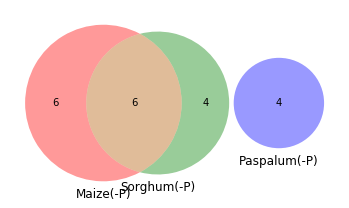

In [26]:
ax = venn3([set(ZmPF), set(SbPF), set(PvPF)],('Maize(-P)', 'Sorghum(-P)','Paspalum(-P)'))

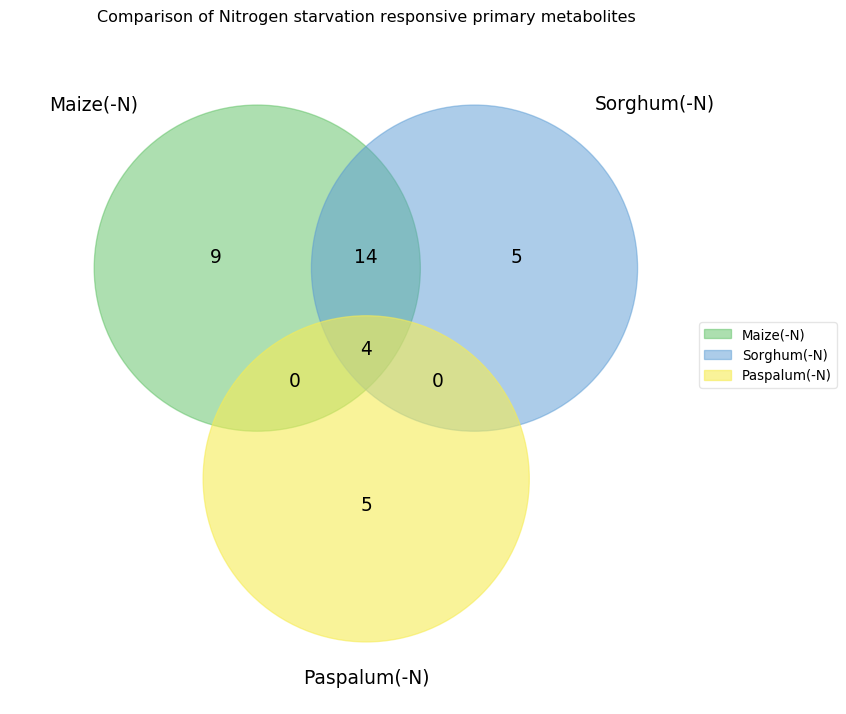

In [20]:
labels = venn.get_labels([set(ZmNF), set(SbNF), set(PvNF)],fill=['number'],)
venn3(labels,names=('Maize(-N)', 'Sorghum(-N)','Paspalum(-N)'))
plt.title('Comparison of Nitrogen starvation responsive primary metabolites')
plt.savefig('Comparison_NF.svg')

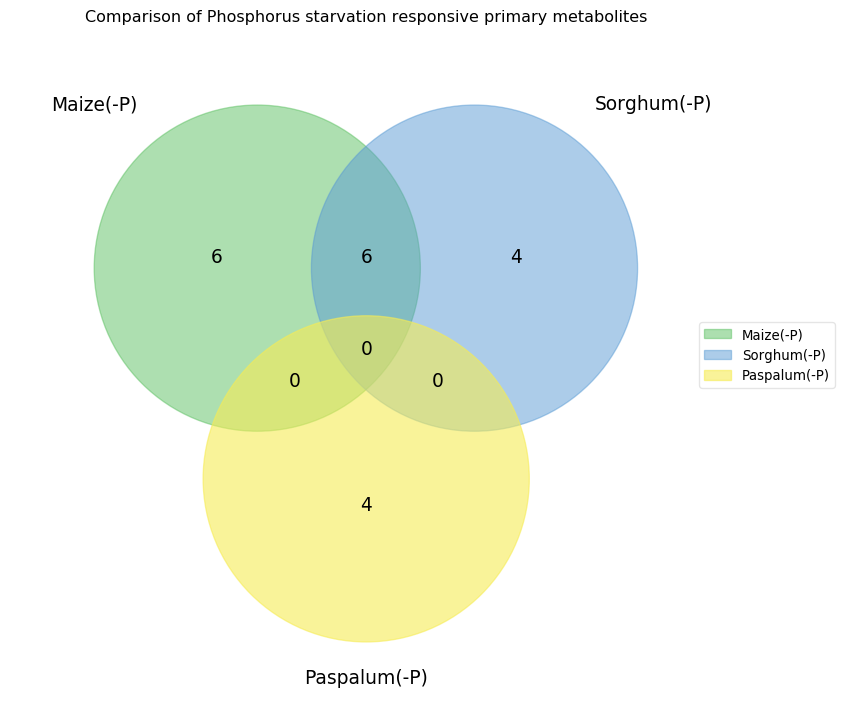

In [21]:
labels = venn.get_labels([set(ZmPF), set(SbPF), set(PvPF)],)#fill=['number'],)
venn.venn3(labels,names=('Maize(-P)', 'Sorghum(-P)','Paspalum(-P)'))
plt.title('Comparison of Phosphorus starvation responsive primary metabolites')
plt.savefig('Comparison_PF.svg')

In [29]:
dfclean = pd.read_csv('2_Cleaned_normalized_Area_92_metabolites.csv',)
dfclean

,Sample,Rawname,Condition,FW_mg,Rep,Species,Treatment,2-hydroxypyridine,Pyruvic acid,L-alanine,...,serotonin,arbutin,eicosapentaenoic acid,adenosine,Sucrose,lactose,maltose,Trehalose,beta-gentiobiose,galactinol
0,Sor_Ndep1,181221_012.D,Sor_Ndep,54.0,1,Sorghum bicolor,N_dep,0.251576,0.015336,0.019508,...,0.001018,0.539128,0.416886,0.094001,2.736975,1.906343,1.762930,1.140207,1.103512,0.265116
1,Sor_Ndep2,181221_013.D,Sor_Ndep,50.0,2,Sorghum bicolor,N_dep,0.211654,0.016744,0.020659,...,0.000427,2.050000,1.805599,0.102193,2.507112,1.809645,1.828206,1.138503,1.109200,0.232000
2,Sor_Ndep3,181221_014.D,Sor_Ndep,50.0,3,Sorghum bicolor,N_dep,0.181786,0.012575,0.022132,...,0.001111,0.390556,1.488130,0.123629,2.964215,1.961747,2.647713,1.792052,1.792205,0.708405
3,Sor_Ndep4,181221_015.D,Sor_Ndep,48.0,4,Sorghum bicolor,N_dep,0.146656,0.011642,0.019273,...,0.000751,2.457424,1.146022,0.115736,3.045384,1.901175,2.381452,1.853418,1.861384,0.704551
4,Sor_Ndep5,181221_016.D,Sor_Ndep,45.0,5,Sorghum bicolor,N_dep,0.202752,0.013738,0.017724,...,0.000484,1.670713,1.663821,0.074278,2.268546,1.668527,1.533161,0.917974,0.939391,0.185231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Set_FN1,181221_107.D,Set_FN,54.3,1,Setaria italica,FN,0.325835,0.030931,0.037067,...,0.111039,8.067196,4.612115,0.013011,3.730590,4.608183,0.961839,0.106675,0.105671,0.082620
86,Set_FN2,181221_108.D,Set_FN,55.7,2,Setaria italica,FN,0.315706,0.028807,0.033302,...,0.140459,7.856736,4.779696,0.014190,3.637011,4.782158,0.746038,0.149041,0.149004,0.087870
87,Set_FN3,181221_109.D,Set_FN,58.3,3,Setaria italica,FN,0.368014,0.037734,0.041083,...,0.199669,9.099527,5.262508,0.015590,4.246544,5.300499,0.862221,0.141138,0.141095,0.108346
88,Set_FN4,181221_110.D,Set_FN,52.0,4,Setaria italica,FN,0.174332,0.012777,0.026211,...,0.004806,1.927206,1.878760,0.009015,2.670573,1.763724,1.097393,0.156089,0.156073,0.348723


In [30]:
newcol = [x.strip() for x in list(dfclean)]
dfclean.columns = newcol

In [31]:
import numpy as np
tList=np.tile(np.repeat(['-N','-P','Full'],5),3)
tList

array(['-N', '-N', '-N', '-N', '-N', '-P', '-P', '-P', '-P', '-P', 'Full',
       'Full', 'Full', 'Full', 'Full', '-N', '-N', '-N', '-N', '-N', '-P',
       '-P', '-P', '-P', '-P', 'Full', 'Full', 'Full', 'Full', 'Full',
       '-N', '-N', '-N', '-N', '-N', '-P', '-P', '-P', '-P', '-P', 'Full',
       'Full', 'Full', 'Full', 'Full'], dtype='<U4')

In [7]:
SelCol = ['Treatment']+seList
dfsub = dfclean.set_index('Species').loc[['Sorghum bicolor','Zea mays B73','Paspalum vaginatum']][SelCol]
dfsub.reset_index(inplace=True)
dfsub['Treatment']=list(tList)

NameError: name 'seList' is not defined

In [26]:
dfsub.to_csv('Boxplot_use.csv',index=False,sep='\t')

In [31]:
subList = ['Species', 'Treatment','allantoin','gamma-aminobutyric acid (GABA)','caffeic acid','maleic acid','succinic acid','Trehalose']
dfsubSub = dfsub[subList]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4a262c518>,
      dtype=object)

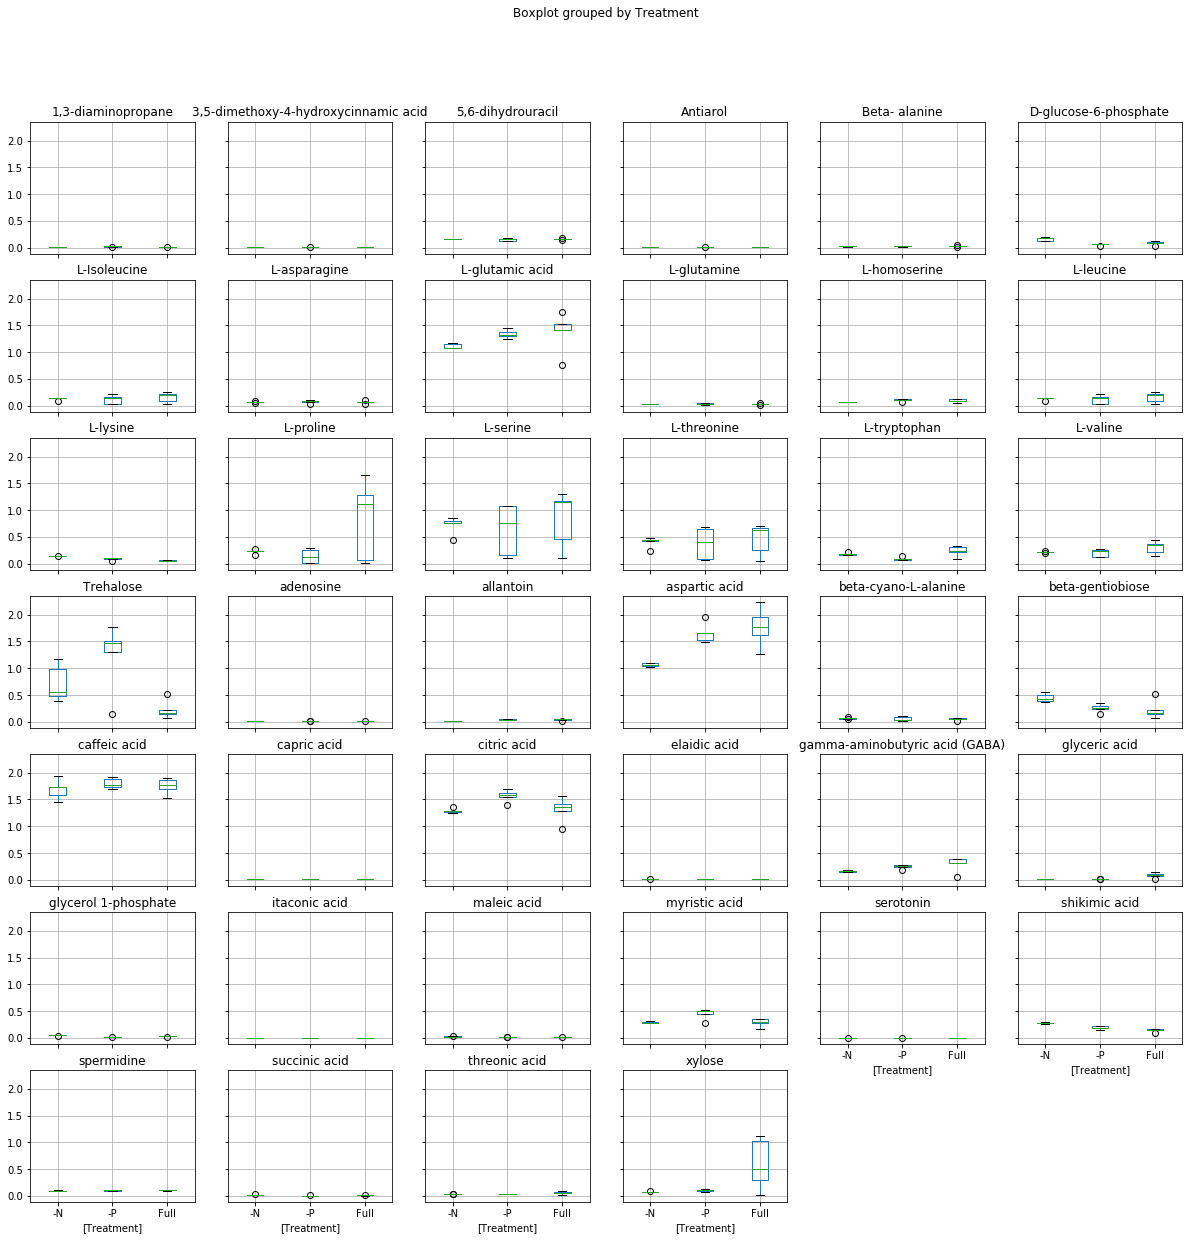

In [54]:
dfsub.set_index('Species').loc['Paspalum vaginatum'].boxplot(by = 'Treatment',figsize=(20,20))

In [32]:
dfSub = pd.read_csv('Boxplot_use.csv',sep='\t')
dfSub

,Species,Treatment,"1,3-diaminopropane",L-serine,glyceric acid,elaidic acid,L-glutamic acid,serotonin,beta-cyano-L-alanine,spermidine,...,L-Isoleucine,capric acid,Antiarol,L-valine,allantoin,aspartic acid,succinic acid,threonic acid,caffeic acid,L-threonine
0,Sorghum bicolor,-N,0.015378,0.639556,0.012265,0.011766,0.677086,0.001018,0.064214,0.052341,...,0.391394,0.015625,0.002170,0.442940,0.002974,0.591639,0.021011,0.022898,0.072962,0.354966
1,Sorghum bicolor,-N,0.016615,0.702190,0.010041,0.009431,0.884707,0.000427,0.061398,0.055289,...,0.378924,0.015630,0.001786,0.465803,0.001952,0.811593,0.019946,0.030087,0.050874,0.409244
2,Sorghum bicolor,-N,0.017965,1.057744,0.010935,0.008456,1.059736,0.001111,0.106191,0.065325,...,0.568775,0.014495,0.002266,0.627686,0.003964,1.011067,0.018559,0.027541,0.041386,0.639018
3,Sorghum bicolor,-N,0.016111,0.397969,0.011183,0.007105,0.965452,0.000751,0.061475,0.075806,...,0.286550,0.015677,0.002136,0.612840,0.004115,0.832370,0.021516,0.020689,0.031262,0.214891
4,Sorghum bicolor,-N,0.014339,0.567209,0.009708,0.006161,0.697514,0.000484,0.074314,0.093109,...,0.270475,0.015492,0.001155,0.348705,0.003591,0.642693,0.017804,0.017796,0.022848,0.309808
5,Sorghum bicolor,-P,0.023101,1.376099,0.012216,0.005083,1.520343,0.003758,0.154231,0.069058,...,0.466748,0.018284,0.002878,1.074624,0.017914,1.452280,0.006494,0.042908,0.025916,0.926128
6,Sorghum bicolor,-P,0.024647,1.118988,0.010533,0.004788,1.389584,0.003182,0.129969,0.071014,...,0.431253,0.018987,0.002806,0.851831,0.014841,1.393155,0.004347,0.033233,0.021208,0.725629
7,Sorghum bicolor,-P,0.014111,1.036229,0.009747,0.004579,1.257205,0.012531,0.108494,0.064711,...,0.346224,0.012758,0.002432,0.808405,0.011588,1.220366,0.004402,0.030672,0.019679,0.605555
8,Sorghum bicolor,-P,0.021571,1.171469,0.010135,0.004866,1.378657,0.002864,0.169757,0.102947,...,0.504724,0.018358,0.004393,1.093433,0.015005,1.304429,0.005042,0.036454,0.018471,0.901085
9,Sorghum bicolor,-P,0.018824,0.664527,0.011092,0.005263,1.189614,0.001351,0.095823,0.134891,...,0.201873,0.016367,0.003023,0.722645,0.012669,1.150247,0.005452,0.036760,0.016619,0.377184


In [33]:
subList = ['Species','Treatment','gamma-aminobutyric acid (GABA)','succinic acid','maleic acid','allantoin','Trehalose']
dfsubSub = dfSub[subList]

0


/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


1
2


/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


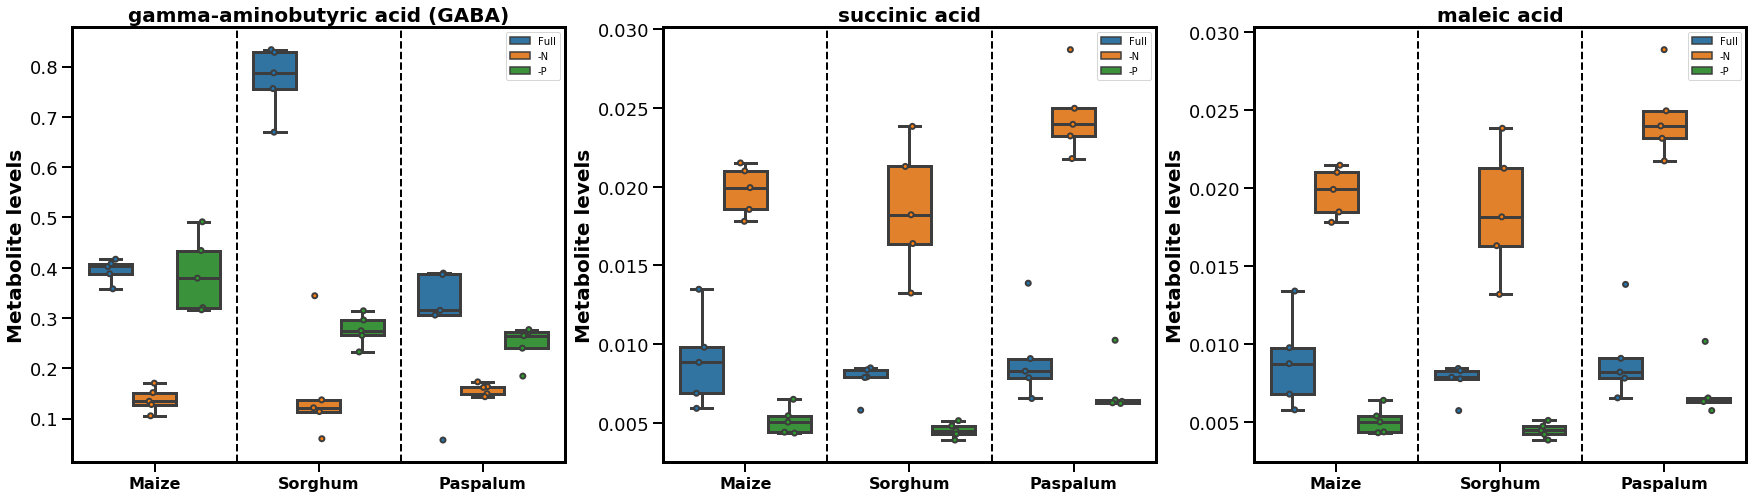

In [37]:
import seaborn as sns
import matplotlib as mpl
fig,axes = plt.subplots(1,3, figsize=(30,8))
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['font.family']=['sans-serif']
for a,b in enumerate(subList[2:5]):
    row = divmod(int(a),3)[1]
    print(row)
    #col = divmod(int(a),3)[1]
    #print(row,col)
    #ax = axes[row,col]
    ax = axes[row]
    sns.boxplot(x='Species',y=b, hue='Treatment', hue_order=['Full','-N','-P'] ,data=dfsubSub,fliersize=0,ax=ax,linewidth=3)
    sns.stripplot(x='Species',y=b, hue='Treatment',hue_order=['Full','-N','-P'],data=dfsubSub, jitter=True,split=True,linewidth=2,edgecolor='gray',ax=ax)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=2)
    ax.axvline(1.5,color='black',linestyle= '--', linewidth=2)
    ax.set_xticklabels(['Maize','Sorghum','Paspalum'],size=16,fontweight='bold')
    ax.set_title(b,fontsize=20,fontweight='bold')
    ax.set_ylabel('Metabolite levels',size=20, color='black',fontweight='bold')
    ax.set_xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:3], labels[:3])
plt.savefig('DE_Met.svg')

0


/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


1


/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


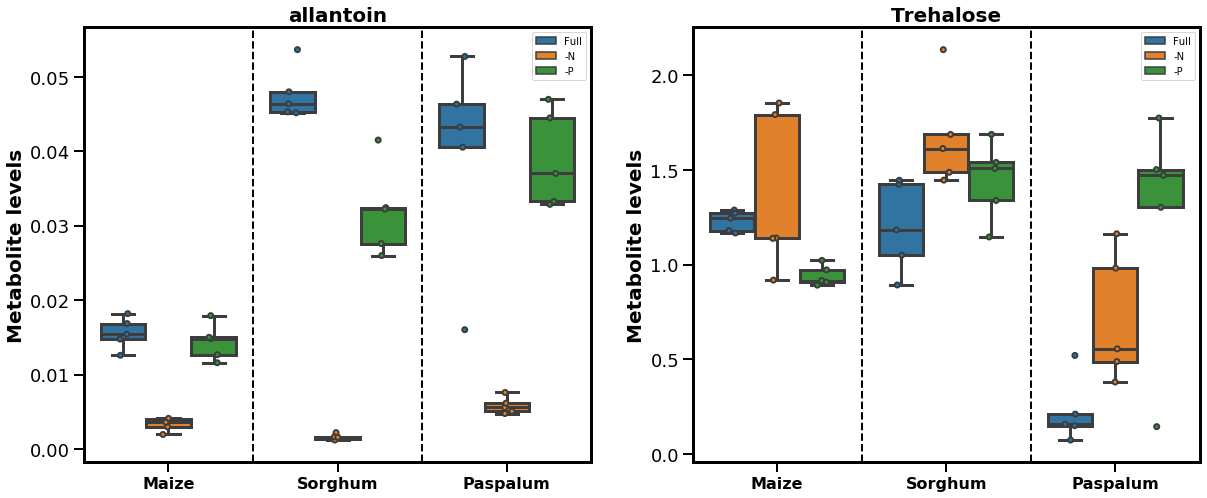

In [38]:
import seaborn as sns
import matplotlib as mpl
fig,axes = plt.subplots(1,2, figsize=(20,8))
subList = ['Species','Treatment','allantoin','Trehalose']
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['font.family']=['sans-serif']
for a,b in enumerate(subList[2:]):
    row = divmod(int(a),2)[1]
    print(row)
    #col = divmod(int(a),3)[1]
    #print(row,col)
    #ax = axes[row,col]
    ax = axes[row]
    sns.boxplot(x='Species',y=b, hue='Treatment', hue_order=['Full','-N','-P'] ,data=dfsubSub,fliersize=0,ax=ax,linewidth=3)
    sns.stripplot(x='Species',y=b, hue='Treatment',hue_order=['Full','-N','-P'],data=dfsubSub, jitter=True,split=True,linewidth=2,edgecolor='gray',ax=ax)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=2)
    ax.axvline(1.5,color='black',linestyle= '--', linewidth=2)
    ax.set_xticklabels(['Maize','Sorghum','Paspalum'],size=16,fontweight='bold')
    ax.set_title(b,fontsize=20,fontweight='bold')
    ax.set_ylabel('Metabolite levels',size=20, color='black',fontweight='bold')
    ax.set_xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:3], labels[:3])
plt.savefig('DE_Met_Alla_Tre.svg')